In [1]:
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore')

In [2]:
!pyspark --version

23/06/21 09:46:01 WARN Utils: Your hostname, delany resolves to a loopback address: 127.0.0.1; using 192.168.0.2 instead (on interface eth0)
23/06/21 09:46:01 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /___/ .__/\_,_/_/ /_/\_\   version 3.2.4
      /_/
                        
Using Scala version 2.12.15, OpenJDK 64-Bit Server VM, 11.0.19
Branch HEAD
Compiled by user centos on 2023-04-09T20:59:10Z
Revision 0ae10ac18298d1792828f1d59b652ef17462d76e
Url https://github.com/apache/spark
Type --help for more information.


In [3]:
!pip install pyspark

     |████████████████████████████████| 281.5 MB 57 kB/s              
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 199 kB 72.7 MB/s            
  Created wheel for pyspark: filename=pyspark-3.2.4-py2.py3-none-any.whl size=282040934 sha256=5c908fe16b0c26c658a1893a87a01eb31f4df902bedcaaa7492440e9ae3109bd
  Stored in directory: /root/.cache/pip/wheels/7f/b5/ab/6fbc298426a10c8a27065ed80da7241e60146d770f41c80b4d
Successfully built pyspark


In [3]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .getOrCreate()

/usr/local/lib/python3.6/dist-packages/pyspark/context.py:238: FutureWarning: Python 3.6 support is deprecated in Spark 3.2.
  FutureWarning


In [104]:
import os
import matplotlib.pyplot as plt

Чтение всех данных

In [23]:
path_data = '/home/data'
files = os.listdir(path_data)

print(files)

['CLASS_052018.csv', 'CLASS_122018.csv', 'CLASS_102018.csv', 'CLASS_032018.csv', 'CLASS_022018.csv', 'CLASS_062018.csv', 'CLASS_072018.csv', 'CLASS_012018.csv', 'CLASS_092018.csv', 'CLASS_112018.csv', '.ipynb_checkpoints', 'CLASS_042018.csv', 'CLASS_082018.csv']


In [24]:
df2 = spark.read.options(delimiter=";",header=True).csv(path_data+'/'+files[0])

In [25]:
print(files)

['CLASS_052018.csv', 'CLASS_122018.csv', 'CLASS_102018.csv', 'CLASS_032018.csv', 'CLASS_022018.csv', 'CLASS_062018.csv', 'CLASS_072018.csv', 'CLASS_012018.csv', 'CLASS_092018.csv', 'CLASS_112018.csv', '.ipynb_checkpoints', 'CLASS_042018.csv', 'CLASS_082018.csv']


In [27]:
for idx in range(1,len(files)):
    if(files[idx] != '.ipynb_checkpoints'):
        temp = spark.read.options(delimiter=";",header=True).csv(path_data+'/'+files[idx])
        df2.union(temp)
        print("file concat ok", files[idx])
    
print(df2.count(),len(df2.columns))    

file concat ok CLASS_122018.csv
file concat ok CLASS_102018.csv
file concat ok CLASS_032018.csv
file concat ok CLASS_022018.csv
file concat ok CLASS_062018.csv
file concat ok CLASS_072018.csv
file concat ok CLASS_012018.csv
file concat ok CLASS_092018.csv
file concat ok CLASS_112018.csv
file concat ok CLASS_042018.csv
file concat ok CLASS_082018.csv
4756180 17


In [142]:
one_race = df2.where(df2.FLT_NUM == '1642')

In [143]:
print(one_race.count(),len(one_race.columns))    

144210 17


In [144]:
one_race.write.option("header", True).option("delimiter",",").csv("race_1642.csv")

In [28]:
df2.show(10,False)

+----------+---+-------+----------+-------+----+----+-----+--------------+----+------+-------+---+---+--------+---+---+
|SDAT_S    |SAK|FLT_NUM|DD        |SEG_NUM|SORG|SDST|SSCL1|SEG_CLASS_CODE|NBCL|FCLCLD|PASS_BK|SA |AU |PASS_DEP|NS |DTD|
+----------+---+-------+----------+-------+----+----+-----+--------------+----+------+-------+---+---+--------+---+---+
|05.05.2018|SU |1174   |04.05.2018|1      |SVO |ASF |Y    |R             |N   |1     |0      |0  |89 |0       |0  |-1 |
|05.05.2018|SU |1174   |04.05.2018|1      |SVO |ASF |Y    |G             |R   |1     |0      |0  |89 |0       |0  |-1 |
|05.05.2018|SU |1174   |04.05.2018|1      |SVO |ASF |Y    |V             |G   |1     |0      |0  |89 |0       |0  |-1 |
|05.05.2018|SU |1175   |04.05.2018|1      |ASF |SVO |C    |J             |    |1     |4      |0  |8  |4       |0  |-1 |
|05.05.2018|SU |1175   |04.05.2018|1      |ASF |SVO |C    |C             |J   |1     |2      |0  |6  |2       |0  |-1 |
|05.05.2018|SU |1175   |04.05.2018|1    

In [29]:
df2.printSchema()

root
 |-- SDAT_S: string (nullable = true)
 |-- SAK: string (nullable = true)
 |-- FLT_NUM: string (nullable = true)
 |-- DD: string (nullable = true)
 |-- SEG_NUM: string (nullable = true)
 |-- SORG: string (nullable = true)
 |-- SDST: string (nullable = true)
 |-- SSCL1: string (nullable = true)
 |-- SEG_CLASS_CODE: string (nullable = true)
 |-- NBCL: string (nullable = true)
 |-- FCLCLD: string (nullable = true)
 |-- PASS_BK: string (nullable = true)
 |-- SA: string (nullable = true)
 |-- AU: string (nullable = true)
 |-- PASS_DEP: string (nullable = true)
 |-- NS: string (nullable = true)
 |-- DTD: string (nullable = true)



## Preproccessing

In [16]:
from pyspark.sql.functions import to_date,  col,expr
import pyspark.sql.functions as F

In [30]:
df = df2.alias("df")

In [31]:
df = df.select("*",to_date(df.DD, 'dd.MM.yyyy').alias("new_DD"))

In [32]:
df = df.select("*",\
               F.year("new_DD").alias("year"),\
               F.month("new_DD").alias("month"),\
               F.dayofmonth("new_DD").alias("dayofmonth"),\
               F.dayofweek("new_DD").alias("dayofweek"),\
               F.quarter("new_DD").alias("quarter"))

Select only useful cols for researching

In [33]:
df.printSchema()

root
 |-- SDAT_S: string (nullable = true)
 |-- SAK: string (nullable = true)
 |-- FLT_NUM: string (nullable = true)
 |-- DD: string (nullable = true)
 |-- SEG_NUM: string (nullable = true)
 |-- SORG: string (nullable = true)
 |-- SDST: string (nullable = true)
 |-- SSCL1: string (nullable = true)
 |-- SEG_CLASS_CODE: string (nullable = true)
 |-- NBCL: string (nullable = true)
 |-- FCLCLD: string (nullable = true)
 |-- PASS_BK: string (nullable = true)
 |-- SA: string (nullable = true)
 |-- AU: string (nullable = true)
 |-- PASS_DEP: string (nullable = true)
 |-- NS: string (nullable = true)
 |-- DTD: string (nullable = true)
 |-- new_DD: date (nullable = true)
 |-- year: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- dayofmonth: integer (nullable = true)
 |-- dayofweek: integer (nullable = true)
 |-- quarter: integer (nullable = true)



In [34]:
df.columns

['SDAT_S',
 'SAK',
 'FLT_NUM',
 'DD',
 'SEG_NUM',
 'SORG',
 'SDST',
 'SSCL1',
 'SEG_CLASS_CODE',
 'NBCL',
 'FCLCLD',
 'PASS_BK',
 'SA',
 'AU',
 'PASS_DEP',
 'NS',
 'DTD',
 'new_DD',
 'year',
 'month',
 'dayofmonth',
 'dayofweek',
 'quarter']

SAK - the same value everywhere

SSCL1 - useless for our task

In [36]:
df_clear = df.select('FLT_NUM','SORG', 'SDST', 'SEG_CLASS_CODE', 'PASS_DEP', 'DTD',\
 'new_DD',\
 'year',\
 'month',\
 'dayofmonth',\
 'dayofweek',\
 'quarter')
print(len(df_clear.columns))

12


Replacing null values

In [38]:
df_clear = df_clear.na.drop() 

In [39]:
df_clear.printSchema()

root
 |-- FLT_NUM: string (nullable = true)
 |-- SORG: string (nullable = true)
 |-- SDST: string (nullable = true)
 |-- SEG_CLASS_CODE: string (nullable = true)
 |-- PASS_DEP: string (nullable = true)
 |-- DTD: string (nullable = true)
 |-- new_DD: date (nullable = true)
 |-- year: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- dayofmonth: integer (nullable = true)
 |-- dayofweek: integer (nullable = true)
 |-- quarter: integer (nullable = true)



Replace all DTD -1 on 0

In [40]:
df_clear = df_clear.withColumn("DTD", F.when(df_clear.DTD == "-1", "0").otherwise(df_clear["DTD"]))

Doudle all passengers which has only one ticket

In [41]:
df_zero_pass = df_clear.where(df_clear.PASS_DEP == "0")
df_rest_pass = df_clear.where(df_clear.PASS_DEP != "0")

In [42]:
df_rest_dubl_pass = df_rest_pass.withColumn("PASS_DEP", expr("explode(array_repeat(PASS_DEP,int(PASS_DEP)))"))

In [43]:
rest_count = df_rest_pass.count()
dubl_count = df_rest_dubl_pass.count()
print("new passengers: ",dubl_count - rest_count )

new passengers:  98095


In [45]:
df_result = df_rest_dubl_pass.union(df_zero_pass)

View the number of unique values in columns

In [46]:
df_result.dropDuplicates(["SEG_CLASS_CODE"]).select("SEG_CLASS_CODE").collect()

[Row(SEG_CLASS_CODE='K'),
 Row(SEG_CLASS_CODE='Q'),
 Row(SEG_CLASS_CODE='E'),
 Row(SEG_CLASS_CODE='T'),
 Row(SEG_CLASS_CODE='B'),
 Row(SEG_CLASS_CODE='Y'),
 Row(SEG_CLASS_CODE='L'),
 Row(SEG_CLASS_CODE='M'),
 Row(SEG_CLASS_CODE='U'),
 Row(SEG_CLASS_CODE='D'),
 Row(SEG_CLASS_CODE='O'),
 Row(SEG_CLASS_CODE='C'),
 Row(SEG_CLASS_CODE='J'),
 Row(SEG_CLASS_CODE='Z'),
 Row(SEG_CLASS_CODE='N'),
 Row(SEG_CLASS_CODE='X'),
 Row(SEG_CLASS_CODE='R'),
 Row(SEG_CLASS_CODE='G'),
 Row(SEG_CLASS_CODE='I'),
 Row(SEG_CLASS_CODE='P'),
 Row(SEG_CLASS_CODE='H'),
 Row(SEG_CLASS_CODE='V')]

In [47]:
df_result.dropDuplicates(["SORG"]).select("SORG").collect()

[Row(SORG='ASF'), Row(SORG='AER'), Row(SORG='SVO')]

In [48]:
df_result.dropDuplicates(["SDST"]).select("SDST").collect()

[Row(SDST='ASF'), Row(SDST='AER'), Row(SDST='SVO')]

In [50]:
df_result.dropDuplicates(["DTD"]).select("DTD").collect()

[Row(DTD='0'),
 Row(DTD='125'),
 Row(DTD='124'),
 Row(DTD='205'),
 Row(DTD='169'),
 Row(DTD='155'),
 Row(DTD='154'),
 Row(DTD='132'),
 Row(DTD='200'),
 Row(DTD='138'),
 Row(DTD='112'),
 Row(DTD='113'),
 Row(DTD='133'),
 Row(DTD='162'),
 Row(DTD='146'),
 Row(DTD='139'),
 Row(DTD='160'),
 Row(DTD='203'),
 Row(DTD='184'),
 Row(DTD='199'),
 Row(DTD='183'),
 Row(DTD='171'),
 Row(DTD='187'),
 Row(DTD='188'),
 Row(DTD='195'),
 Row(DTD='110'),
 Row(DTD='107'),
 Row(DTD='214'),
 Row(DTD='179'),
 Row(DTD='202'),
 Row(DTD='163'),
 Row(DTD='206'),
 Row(DTD='174'),
 Row(DTD='168'),
 Row(DTD='166'),
 Row(DTD='140'),
 Row(DTD='131'),
 Row(DTD='126'),
 Row(DTD='120'),
 Row(DTD='130'),
 Row(DTD='207'),
 Row(DTD='164'),
 Row(DTD='147'),
 Row(DTD='208'),
 Row(DTD='198'),
 Row(DTD='136'),
 Row(DTD='118'),
 Row(DTD='185'),
 Row(DTD='201'),
 Row(DTD='177'),
 Row(DTD='194'),
 Row(DTD='128'),
 Row(DTD='111'),
 Row(DTD='197'),
 Row(DTD='167'),
 Row(DTD='189'),
 Row(DTD='190'),
 Row(DTD='156'),
 Row(DTD='135'),

Agg all dataframe by count passengers

In [51]:
df_result.printSchema()

root
 |-- FLT_NUM: string (nullable = true)
 |-- SORG: string (nullable = true)
 |-- SDST: string (nullable = true)
 |-- SEG_CLASS_CODE: string (nullable = true)
 |-- PASS_DEP: string (nullable = true)
 |-- DTD: string (nullable = true)
 |-- new_DD: date (nullable = true)
 |-- year: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- dayofmonth: integer (nullable = true)
 |-- dayofweek: integer (nullable = true)
 |-- quarter: integer (nullable = true)



In [52]:
df_passengers = df_result.groupBy("FLT_NUM", "SORG", "SDST", "SEG_CLASS_CODE", "DTD","year","month","dayofmonth", "dayofweek", "quarter")\
    .agg({"*": "count"})

df_passengers = df_passengers.withColumnRenamed('count(1)', 'count_passengers')
passengers_count = df_passengers.count()

In [57]:
print(passengers_count,len(df_passengers.columns))  
print("diff from first df: ", 4756180 - passengers_count) # df_result was 4756180

4640353 11
diff from first df:  115827


In [58]:
df_passengers.write.option("header", True).option("delimiter",",").csv("result_2018.csv")

In [59]:
df_passengers.show(15, False)

+-------+----+----+--------------+---+----+-----+----------+---------+-------+----------------+
|FLT_NUM|SORG|SDST|SEG_CLASS_CODE|DTD|year|month|dayofmonth|dayofweek|quarter|count_passengers|
+-------+----+----+--------------+---+----+-----+----------+---------+-------+----------------+
|1129   |AER |SVO |X             |0  |2018|5    |4         |6        |2      |2               |
|1122   |SVO |AER |L             |0  |2018|5    |5         |7        |2      |6               |
|1135   |AER |SVO |J             |0  |2018|5    |4         |6        |2      |3               |
|1172   |SVO |ASF |E             |0  |2018|5    |4         |6        |2      |43              |
|1174   |SVO |ASF |D             |0  |2018|5    |3         |5        |2      |2               |
|1135   |AER |SVO |N             |0  |2018|5    |1         |3        |2      |44              |
|1643   |ASF |SVO |T             |0  |2018|5    |1         |3        |2      |2               |
|1138   |SVO |AER |I             |0  |20

#### Сombining all summed datasets

In [64]:
path_data_2018 = '/home/result_2018.csv'
files_result_2018 = os.listdir(path_data_2018)

path_data_2019 = '/home/result_2019.csv'
files_result_2019 = os.listdir(path_data_2019)

In [71]:
files_result_2018

['part-00000-b96aff4c-740b-46ca-80b4-8e09a6115cb1-c000.csv',
 'part-00001-b96aff4c-740b-46ca-80b4-8e09a6115cb1-c000.csv']

In [66]:
files_result_2019 = ['part-00000-2cba3736-9594-46ac-805e-b0157232964d-c000.csv', 'part-00001-2cba3736-9594-46ac-805e-b0157232964d-c000.csv' ]
files_result_2018 = ['part-00000-b96aff4c-740b-46ca-80b4-8e09a6115cb1-c000.csv', 'part-00001-b96aff4c-740b-46ca-80b4-8e09a6115cb1-c000.csv']

In [79]:
files =  files_result_2018+ files_result_2019 
df_all = spark.read.options(delimiter=",",header=True).csv(path_data_2018+'/'+files[0])

In [80]:
df_all.show(10,True)

+-------+----+----+--------------+---+----+-----+----------+---------+-------+----------------+
|FLT_NUM|SORG|SDST|SEG_CLASS_CODE|DTD|year|month|dayofmonth|dayofweek|quarter|count_passengers|
+-------+----+----+--------------+---+----+-----+----------+---------+-------+----------------+
|   1120| SVO| AER|             B|  0|2018|    5|         1|        3|      2|               2|
|   1120| SVO| AER|             B|  0|2018|    5|         2|        4|      2|               2|
|   1120| SVO| AER|             B|  0|2018|    5|         4|        6|      2|               2|
|   1120| SVO| AER|             B|  0|2018|    5|         5|        7|      2|               2|
|   1120| SVO| AER|             B|  0|2018|    5|         6|        1|      2|               2|
|   1120| SVO| AER|             B|  0|2018|    5|         7|        2|      2|               2|
|   1120| SVO| AER|             B|  0|2018|    5|         8|        3|      2|               2|
|   1120| SVO| AER|             B|  0|20

In [87]:
for idx in range(1,len(files)):
    if(idx==1):
        temp = spark.read.options(delimiter=",",header=True).csv(path_data_2018+'/'+files[idx])
        df_all.union(temp)
    else:
        temp = spark.read.options(delimiter=",",header=True).csv(path_data_2019+'/'+files[idx])
        df_all.union(temp)
    print("file concat ok", files[idx])

file concat ok part-00001-b96aff4c-740b-46ca-80b4-8e09a6115cb1-c000.csv
file concat ok part-00000-2cba3736-9594-46ac-805e-b0157232964d-c000.csv
file concat ok part-00001-2cba3736-9594-46ac-805e-b0157232964d-c000.csv


In [88]:
print(df_all.count(),len(df_all.columns))  # all counts  

9532242 11


In [ ]:
df_passengers = df_all.alias("df_passengers")

## Training

In [89]:
from pyspark.ml import Pipeline
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.feature import VectorAssembler, StringIndexer, VectorIndexer, OneHotEncoder
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.regression import LinearRegression, GBTRegressor

In [90]:
df_passengers.printSchema()

root
 |-- FLT_NUM: string (nullable = true)
 |-- SORG: string (nullable = true)
 |-- SDST: string (nullable = true)
 |-- SEG_CLASS_CODE: string (nullable = true)
 |-- DTD: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- dayofmonth: integer (nullable = true)
 |-- dayofweek: integer (nullable = true)
 |-- quarter: integer (nullable = true)
 |-- count_passengers: long (nullable = false)



In [91]:
df_passengers = df_passengers.withColumn("DTD", df_passengers["DTD"].cast("int"))

In [92]:
col_si_in = ["FLT_NUM", "SORG", "SDST", "SEG_CLASS_CODE"]
col_si_out = [str(i+"_si") for i in col_si_in]

col_ohe_in = col_si_out + ["DTD", "year","month","dayofmonth","dayofweek","quarter"]
col_ohe_out = [str(i+"_ohe") for i in col_ohe_in]

In [93]:
label = 'count_passengers'

Split the data into training and test sets (30% held out for testing)

In [94]:
(trainingData, testData) = df_passengers.randomSplit([0.7, 0.3])

Create steps for pipeline

In [95]:
si_indexer = StringIndexer(inputCols=col_si_in, outputCols=col_si_out)

In [96]:
encoder = OneHotEncoder(inputCols=col_ohe_in,
                        outputCols=col_ohe_out)

In [97]:
assembler = VectorAssembler(
    inputCols=col_ohe_out,
    outputCol="features")

Scale features using Normalization

In [99]:
from pyspark.ml.feature import StandardScaler

scaler = StandardScaler(inputCol = "features",
                        outputCol = "scaledFeatures",
                        withStd = True,
                        withMean = True)

LinearRegressionlr


In [100]:
lr = LinearRegression(elasticNetParam=0.8, featuresCol='features', labelCol=label)

In [127]:
pipeline = Pipeline(stages=[si_indexer, encoder, assembler, lr])

In [128]:
model = pipeline.fit(trainingData)

In [131]:
lrModel= model.stages[-1]

# training metrics
trainingSummary = lrModel.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % (trainingSummary.r2))

RMSE: 0.985819
r2: 0.274234


 check the most important attributes for training

In [107]:
# Print the coefficients and intercept for linear regression
print("Intercept: %s" % str(lrModel.intercept))
print("Coefficients: %s" % str(lrModel.coefficients[:50]))

Intercept: 1.009238373005638
Coefficients: [ 0.00628939  0.00380161  0.00165343 -0.00064653  0.00648736  0.00631032
  0.00611255  0.00605807 -0.01236887 -0.0033613   0.00211962  0.00197356
  0.00169233  0.00200848  0.00341985  0.0031108  -0.00042398 -0.00952471
  0.00929198  0.00589103  0.00210357  0.00361468 -0.00240407  0.01264944
 -0.00516249 -0.00087683 -0.00063515  0.00087683 -0.0026434  -0.0346189
 -0.03467469 -0.03588359 -0.03453621 -0.03110589 -0.03430976 -0.03184382
 -0.02683229 -0.0364425  -0.03628079 -0.0331826   0.03034687 -0.0349412
  0.21982243 -0.03592712 -0.00835728 -0.02337122 -0.00746911 -0.0320109
  0.07916655 -0.02730102]


some coefficients are zero,  should check the importance of the signs again

RandomForestRegressor

In [112]:
rf = RandomForestRegressor(featuresCol='features', labelCol=label)

In [113]:
pipeline = Pipeline(stages=[si_indexer, encoder, assembler, rf])
model = pipeline.fit(trainingData)

In [114]:
# Make predictions.
predictions_rf = model.transform(testData)

In [115]:
# Select example rows to display.
predictions_rf.select("prediction", label, "features").show(5)

+-----------------+----------------+--------------------+
|       prediction|count_passengers|            features|
+-----------------+----------------+--------------------+
|4.559165889652663|               2|(2330,[25,28,34,5...|
|4.559165889652663|               2|(2330,[25,28,34,5...|
|4.559165889652663|               2|(2330,[25,28,34,5...|
|4.559165889652663|               2|(2330,[25,28,34,5...|
|4.559165889652663|               2|(2330,[25,28,34,5...|
+-----------------+----------------+--------------------+
only showing top 5 rows



In [123]:
# Select (prediction, true label) and compute test error
evaluator = RegressionEvaluator(labelCol=label, predictionCol="prediction", metricName="r2")
r_metrics = evaluator.evaluate(predictions_rf)

In [125]:
print("Coefficient of determination(R^2) on test data = %g" % r_metrics)

Coefficient of determination(R^2) on test data = 0.821665


In [119]:
rfModel = model.stages[-1]
print(rfModel)  # summary only

RandomForestRegressionModel: uid=RandomForestRegressor_435a59be3b23, numTrees=20, numFeatures=2330


In [120]:
x_ax = range(0, predictions_rf.count())
y_pred=predictions_rf.select("prediction").collect()
y_orig=predictions_rf.select(label).collect()

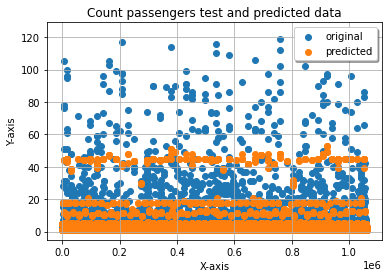

In [121]:
plt.scatter(x_ax, y_orig, label="original")
plt.scatter(x_ax, y_pred, label="predicted")
plt.title("Count passengers test and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [122]:
predictions_rf.select("prediction", label, "features").show(10)

+------------------+----------------+--------------------+
|        prediction|count_passengers|            features|
+------------------+----------------+--------------------+
| 4.559165889652663|               2|(2330,[25,28,34,5...|
| 4.559165889652663|               2|(2330,[25,28,34,5...|
| 4.559165889652663|               2|(2330,[25,28,34,5...|
| 4.559165889652663|               2|(2330,[25,28,34,5...|
| 4.559165889652663|               2|(2330,[25,28,34,5...|
| 4.559165889652663|               2|(2330,[25,28,34,5...|
| 4.559165889652663|               2|(2330,[25,28,34,5...|
| 4.559165889652663|               2|(2330,[25,28,34,5...|
|1.0016632226034021|               1|(2330,[25,28,34,5...|
|1.0016632226034021|               1|(2330,[25,28,34,5...|
+------------------+----------------+--------------------+
only showing top 10 rows



GBTRegressor

In [145]:
gbtr = GBTRegressor(featuresCol='features', labelCol=label, maxDepth=2, seed=42)

In [146]:
pipeline = Pipeline(stages=[si_indexer, encoder, assembler, gbtr])
model = pipeline.fit(trainingData)

In [148]:
gbtr_prediction = predictions.alias("gbtr_prediction")

In [147]:
# Make predictions.
predictions = model.transform(testData)
evaluator = RegressionEvaluator(
    labelCol=label, predictionCol="prediction", metricName="r2")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Root Mean Squared Error (RMSE) on test data = 0.675938


In [ ]:
x_ax = range(0, predictions.count())
y_pred=predictions.select("prediction").collect()
y_orig=predictions.select(label).collect()

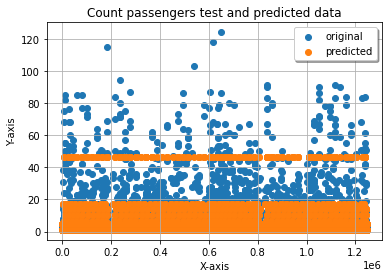

In [152]:
plt.scatter(x_ax, y_orig, label="original")
plt.scatter(x_ax, y_pred, label="predicted")
plt.title("Count passengers test and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

CrossValidator

In [132]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

In [133]:
# Create an empty parameter grid
params = ParamGridBuilder()
# Add grids for two parameters
params = params.addGrid(lr.regParam, [0.01, 0.1, 1.0])\
               .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])

In [134]:
# Build the parameter grid
params = params.build()
print('Number of models to be tested: ', len(params))

Number of models to be tested:  9


In [135]:
pipeline = Pipeline(stages=[si_indexer, encoder, assembler])
model_scaled = pipeline.fit(trainingData)
trainingData_scaled = model_scaled.transform(trainingData)

In [136]:
testData_scaled =  model_scaled.transform(testData)

In [139]:
regression = LinearRegression(labelCol=label)
evaluator = RegressionEvaluator(
    labelCol=label, predictionCol="prediction", metricName="r2")

In [ ]:
cv = CrossValidator(estimator=regression, estimatorParamMaps=params, 
                    evaluator=evaluator, numFolds=5)

cv_model = cv.fit(trainingData_scaled)

In [ ]:
cv_model.bestModel.extractParamMap()

In [ ]:
spark.stop()  